-1.4710815036366627 0.8549727566530938
4.337218821035101 1.0192043753396958
-10.049352425116378 0.8279042233273208
-3.859540950538311 0.8653146359914938
-6.581967860885247 0.7785371204187849
-8.172393393876066 0.9338872604729217
Efficiency of Naive Bayes: 100.0 %


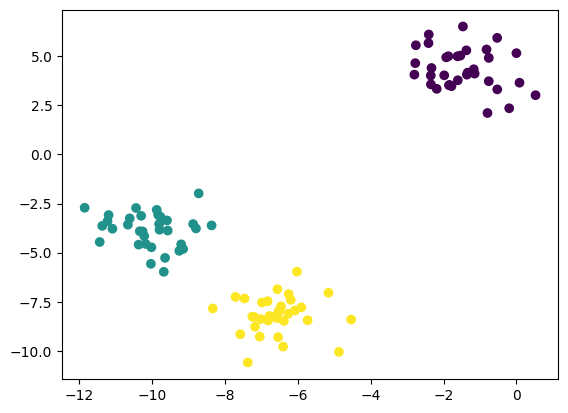

In [40]:
# Naive Bayes CLassifier Algorithm
# example of preparing and making a prediction with a naive bayes model
from sklearn.datasets import make_blobs
from scipy.stats import norm
import numpy as np
from numpy import mean
from numpy import std

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
    mu = mean(data)
    sigma = std(data)
    print(mu, sigma)
    # fit distribution
    dist = norm(mu, sigma)
    return dist

# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
    return prior*dist1.pdf(X[0])*dist2.pdf(X[1])

# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
# sort data into classes
Xy0 = X[y==0]
Xy1 = X[y==1]
Xy2 = X[y==2]
# calculate priors
priory0 = len(Xy0)/len(X)
priory1 = len(Xy1)/len(X)
priory2 = len(Xy2)/len(X)
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:,0])
distX2y0 = fit_distribution(Xy0[:,1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:,0])
distX2y1 = fit_distribution(Xy1[:,1])
# create PDFs for y==2
distX1y2 = fit_distribution(Xy2[:,0])
distX2y2 = fit_distribution(Xy2[:,1])
# classify one example
ctr=0
for i in range(0,len(X)):
    Xsample, ysample = X[i],y[i]
    py0 = probability(Xsample, priory0, distX1y0, distX2y0)
    py1 = probability(Xsample, priory1, distX1y1, distX2y1)
    py2 = probability(Xsample, priory2, distX1y2, distX2y2)
    p = [py0, py1, py2]
    id = np.argmax(p)
    if id == ysample:
        ctr=ctr+1
efficiency = (ctr/len(X))*100
print(f'Efficiency of Naive Bayes: {efficiency} %')